# Project: Global Stock Market Analysis and Prediction

## Stock Market Data From yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [2]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [4]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [37]:
import yfinance as yf

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [25]:
import yfinance as yf
from datetime import datetime

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

# Loop for grabbing and dynamically assigning stock data to variables
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Now you can use AAPL.head(), GOOGL.head(), etc.
print(AAPL.head())  # Display data for Apple (AAPL)
print(GOOGL.head())  # Display data for Google (GOOGL)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-12-04 00:00:00+00:00  188.506500  189.429993  190.050003  187.449997   
2023-12-05 00:00:00+00:00  192.477051  193.419998  194.399994  190.179993   
2023-12-06 00:00:00+00:00  191.382431  192.320007  194.759995  192.110001   
2023-12-07 00:00:00+00:00  193.322922  194.270004  195.000000  193.589996   
2023-12-08 00:00:00+00:00  194.755875  195.710007  195.990005  193.669998   

Price                            Open    Volume  
Ticker                           AAPL      AAPL  
Date                                             
2023-12-04 00:00:00+00:00  189.979996  43389500  
2023-12-05 00:00:00+00:00  190.210007  66628400  
2023-12-06 00:00:00+00:00  194.449997  41089700  
2023-12-07 00:00:00+00:00  193.630005  47477700  
2023-12-08 00:00:00+00:00  194.19

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL(Apple) Stock DataFrame to get a feel for the data.

In [26]:
AAPL.head()

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-12-04 00:00:00+00:00  188.506500  189.429993  190.050003  187.449997   
2023-12-05 00:00:00+00:00  192.477051  193.419998  194.399994  190.179993   
2023-12-06 00:00:00+00:00  191.382431  192.320007  194.759995  192.110001   
2023-12-07 00:00:00+00:00  193.322922  194.270004  195.000000  193.589996   
2023-12-08 00:00:00+00:00  194.755875  195.710007  195.990005  193.669998   

Price                            Open    Volume  
Ticker                           AAPL      AAPL  
Date                                             
2023-12-04 00:00:00+00:00  189.979996  43389500  
2023-12-05 00:00:00+00:00  190.210007  66628400  
2023-12-06 00:00:00+00:00  194.449997  41089700  
2023-12-07 00:00:00+00:00  193.630005  47477700  
2023-12-08 00:00:00+00:00  194.199997  53377300

In [27]:
# Summery stats for Apple Stock
AAPL.describe()


Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    202.497758  203.005079  204.668810  201.090476  202.809444   
std      22.631225   22.444306   22.574832   22.072936   22.335692   
min     164.405121  165.000000  166.399994  164.080002  165.350006   
25%     183.452496  184.224998  185.134995  182.204998  183.827499   
50%     196.213058  196.915001  197.489998  194.840004  196.130005   
75%     225.195492  225.257496  226.924999  223.250000  224.992504   
max     242.649994  242.649994  242.759995  238.899994  239.809998   

Price         Volume  
Ticker          AAPL  
count   2.520000e+02  
mean    5.762775e+07  
std     3.044879e+07  
min     2.811130e+07  
25%     4.213035e+07  
50%     5.028685e+07  
75%     6.445522e+07  
max     3.186799e+08

In [28]:
# General Info
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-12-04 00:00:00+00:00 to 2024-12-03 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  252 non-null    float64
 1   (Close, AAPL)      252 non-null    float64
 2   (High, AAPL)       252 non-null    float64
 3   (Low, AAPL)        252 non-null    float64
 4   (Open, AAPL)       252 non-null    float64
 5   (Volume, AAPL)     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

<Axes: xlabel='Date'>

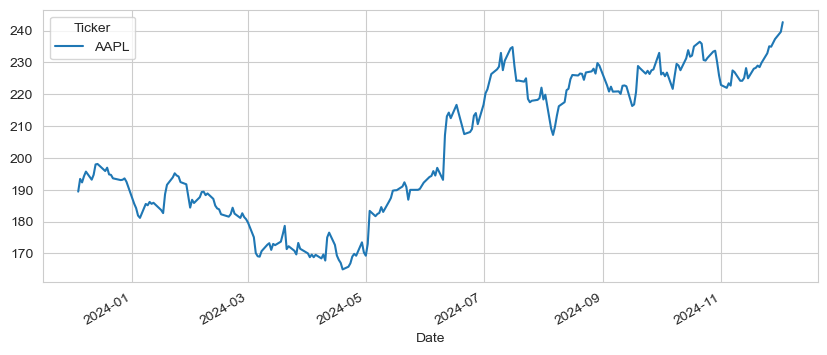

In [29]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

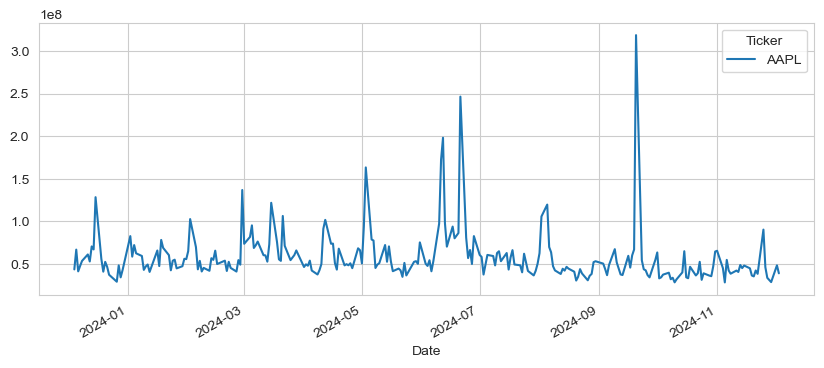

In [30]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

We can see that on Sep'2024 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [31]:

#Calculate rolling mean for Apple (AAPL) stock data
MA_day = [10, 20, 50, 100]  # Example list of moving average days

for ma in MA_day:
    column_name = 'MA for %s days' % (str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()



Now, lets plot all the additional Moving Averages for AAPL stock

<Axes: xlabel='Date'>

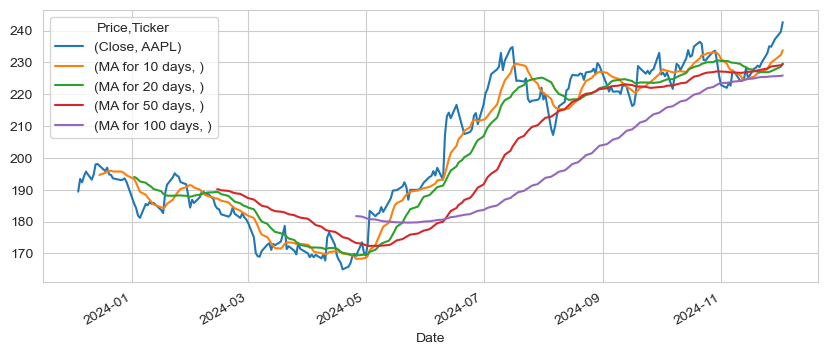

In [32]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. 


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.


<Axes: xlabel='Date'>

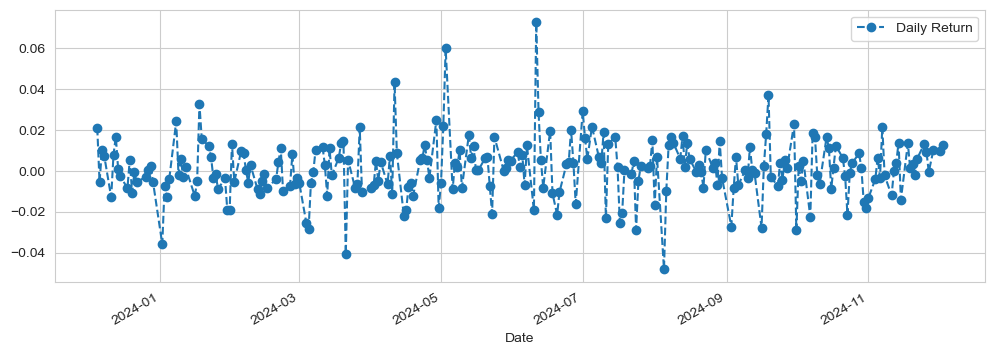

In [33]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

<Axes: >

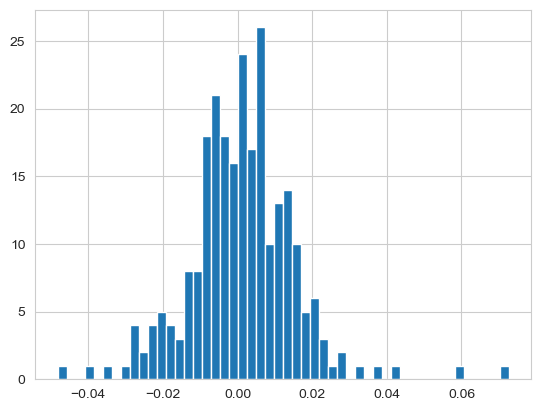

In [20]:
# only with histogram
AAPL['Daily Return'].hist(bins=50)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6708\3986253864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=50, color='magenta')


<Axes: xlabel='Daily Return', ylabel='Density'>

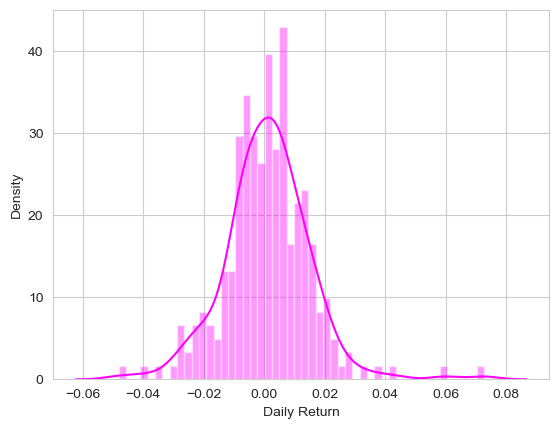

In [34]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=50, color='magenta')

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [35]:
closingprice_df = yf.download(tech_list, start=start, end=end)['Close']

[*********************100%***********************]  4 of 4 completed


In [36]:
closingprice_df.head(10)

Ticker                           AAPL        AMZN       GOOGL        MSFT
Date                                                                     
2023-12-04 00:00:00+00:00  189.429993  144.839996  129.270004  369.140015
2023-12-05 00:00:00+00:00  193.419998  146.880005  130.990005  372.519989
2023-12-06 00:00:00+00:00  192.320007  144.520004  130.020004  368.799988
2023-12-07 00:00:00+00:00  194.270004  146.880005  136.929993  370.950012
2023-12-08 00:00:00+00:00  195.710007  147.419998  134.990005  374.230011
2023-12-11 00:00:00+00:00  193.179993  145.889999  133.289993  371.299988
2023-12-12 00:00:00+00:00  194.710007  147.479996  132.520004  374.380005
2023-12-13 00:00:00+00:00  197.960007  148.839996  132.570007  374.369995
2023-12-14 00:00:00+00:00  198.110001  147.419998  131.940002  365.929993
2023-12-15 00:00:00+00:00  197.570007  149.970001  132.600006  370.730011

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [37]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [38]:
tech_returns.head()

Ticker                         AAPL      AMZN     GOOGL      MSFT
Date                                                             
2023-12-04 00:00:00+00:00       NaN       NaN       NaN       NaN
2023-12-05 00:00:00+00:00  0.021063  0.014085  0.013305  0.009156
2023-12-06 00:00:00+00:00 -0.005687 -0.016068 -0.007405 -0.009986
2023-12-07 00:00:00+00:00  0.010139  0.016330  0.053146  0.005830
2023-12-08 00:00:00+00:00  0.007412  0.003676 -0.014168  0.008842

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

##### GOOGL is a Alphabet Inc Class A Stock.

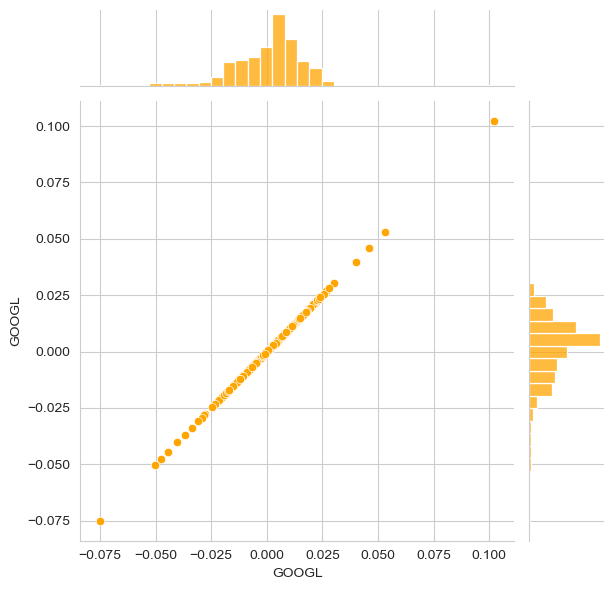

In [39]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

So let's go ahead and compare Google and Amazon the same way.

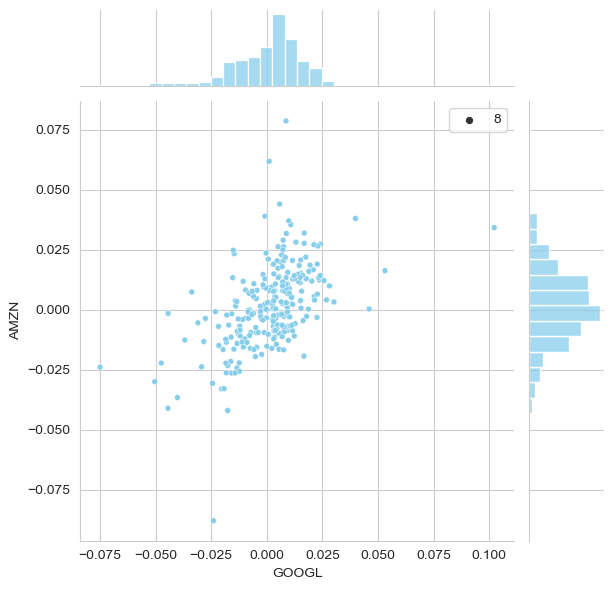

In [40]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot(x='GOOGL',y='AMZN',data=tech_returns, kind='scatter',size=8, color='skyblue')

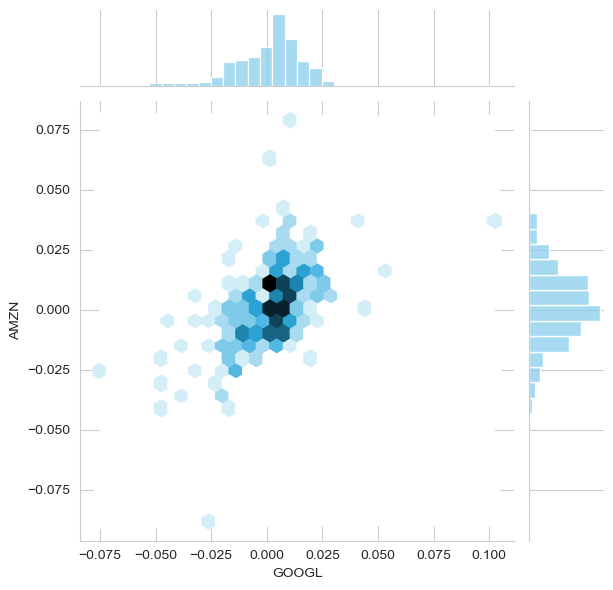

In [41]:
# with Hex plot
sns.jointplot(x='GOOGL',y='AMZN',data=tech_returns, kind='hex', color='skyblue')

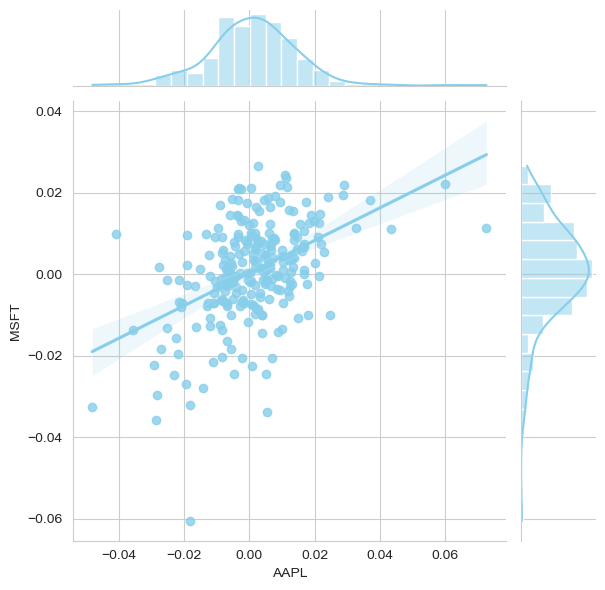

In [42]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot(x='AAPL',y='MSFT',data=tech_returns, kind='reg', color='skyblue')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

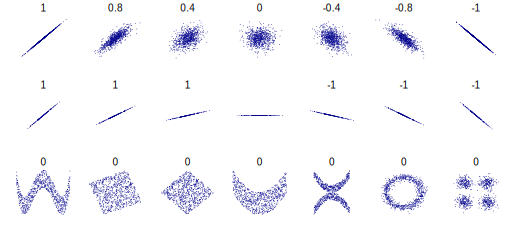

In [43]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


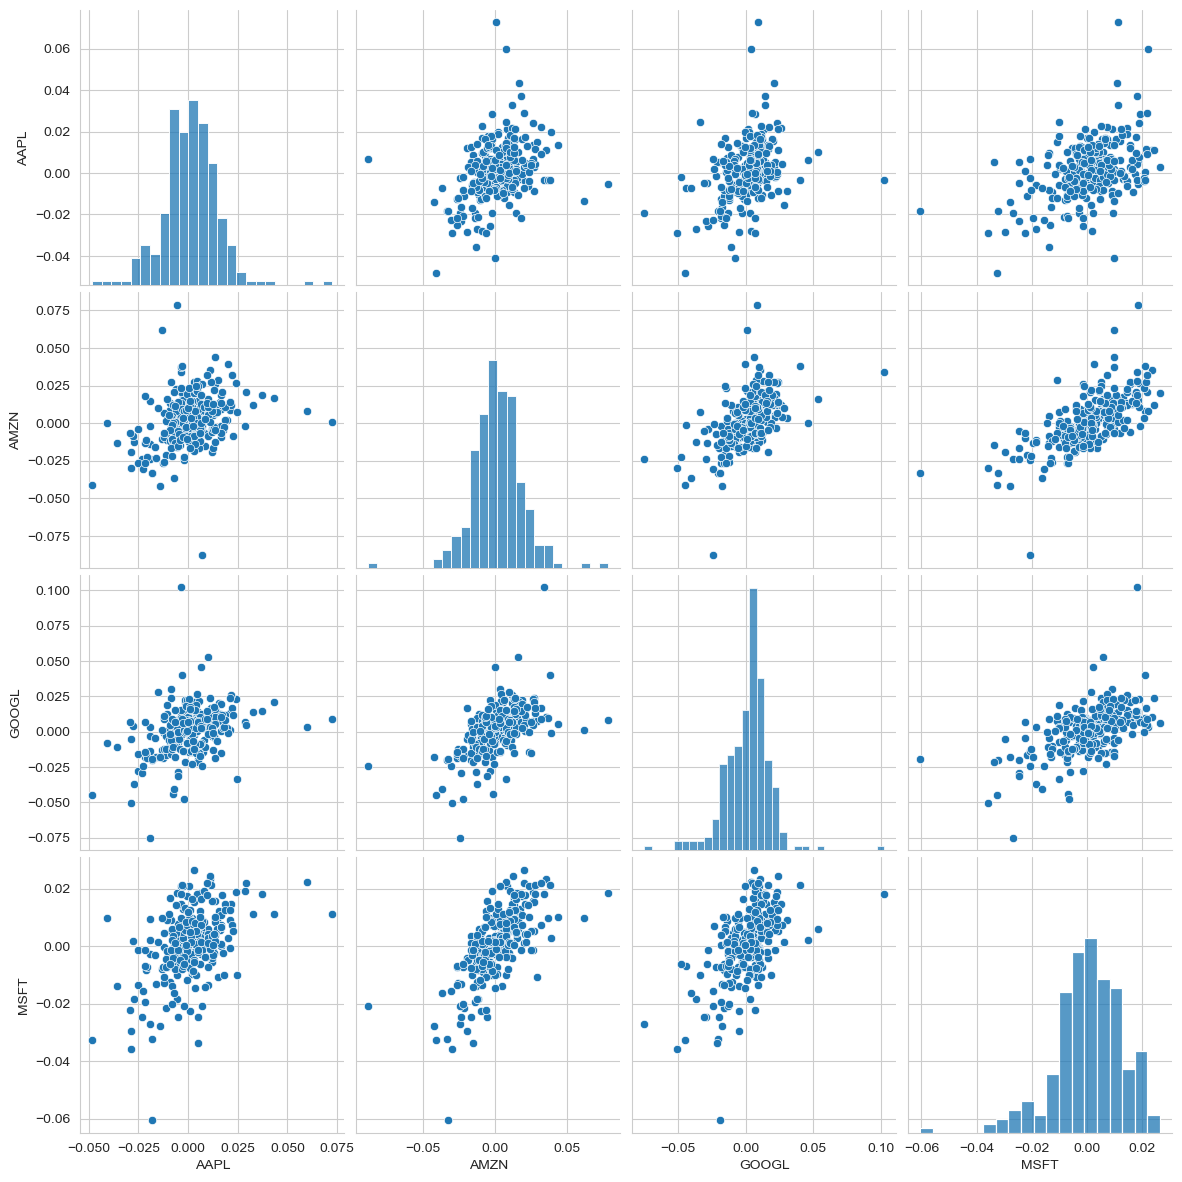

In [44]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Microsoft and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

Below is an example of utilizing the full power of seaborn to achieve this result.

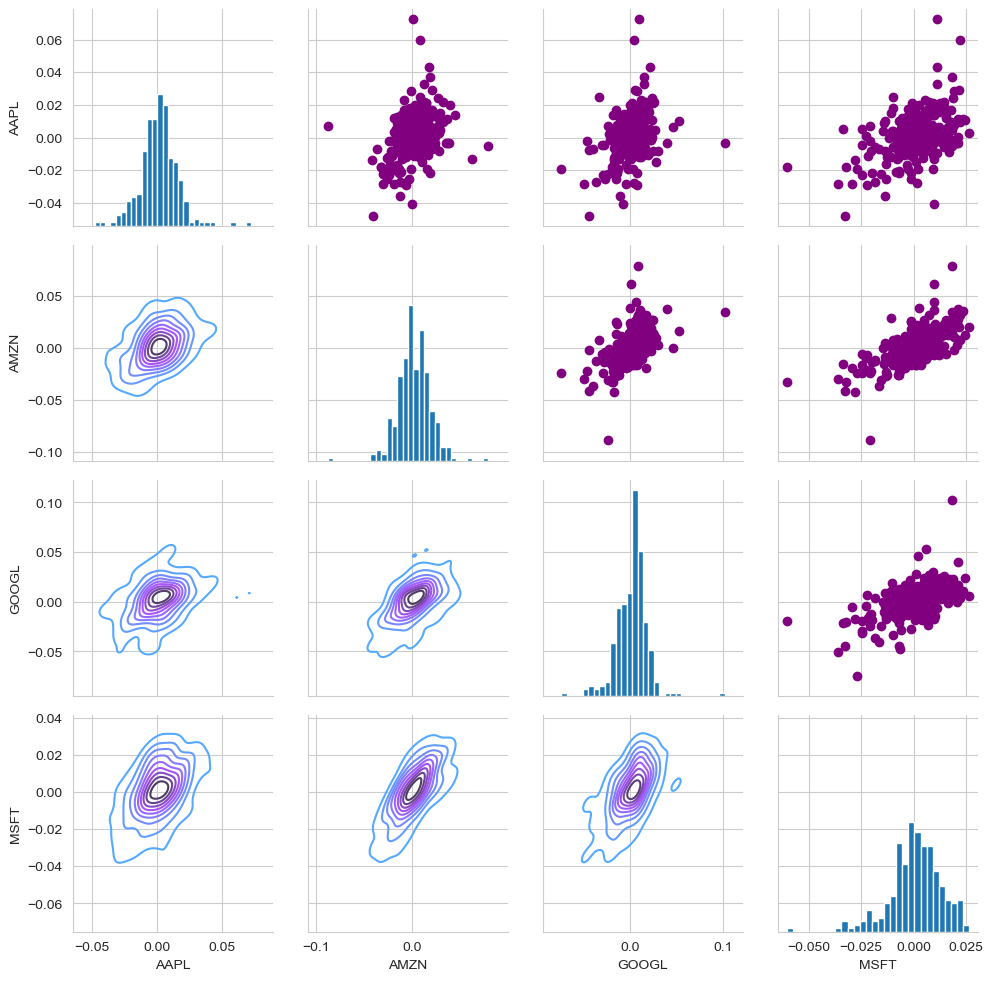

In [45]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

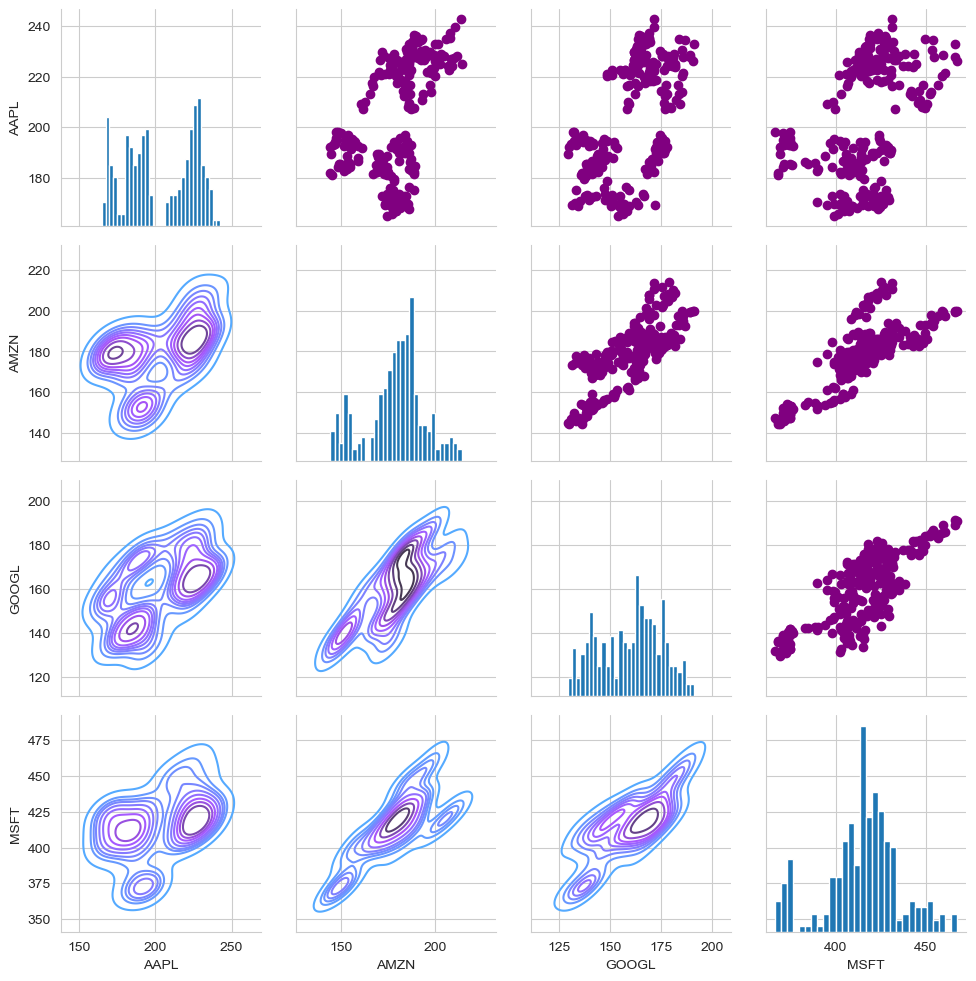

In [46]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

<Axes: xlabel='Ticker', ylabel='Ticker'>

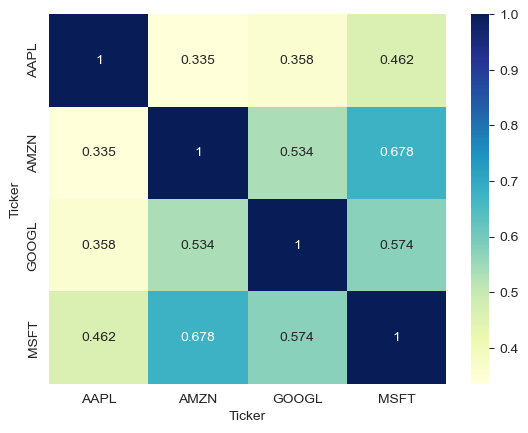

In [47]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<Axes: xlabel='Ticker', ylabel='Ticker'>

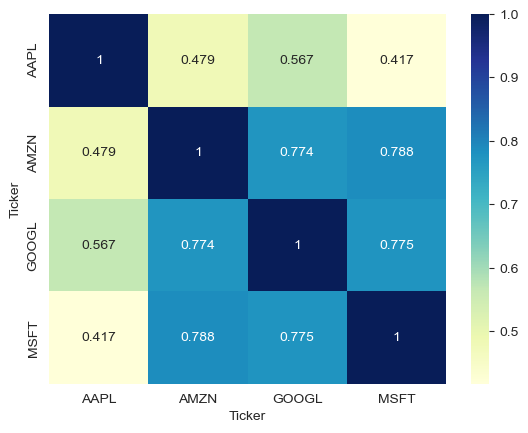

In [48]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

##### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Microsoft had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [49]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [50]:
rets.head()

Ticker                         AAPL      AMZN     GOOGL      MSFT
Date                                                             
2023-12-05 00:00:00+00:00  0.021063  0.014085  0.013305  0.009156
2023-12-06 00:00:00+00:00 -0.005687 -0.016068 -0.007405 -0.009986
2023-12-07 00:00:00+00:00  0.010139  0.016330  0.053146  0.005830
2023-12-08 00:00:00+00:00  0.007412  0.003676 -0.014168  0.008842
2023-12-11 00:00:00+00:00 -0.012927 -0.010379 -0.012594 -0.007829

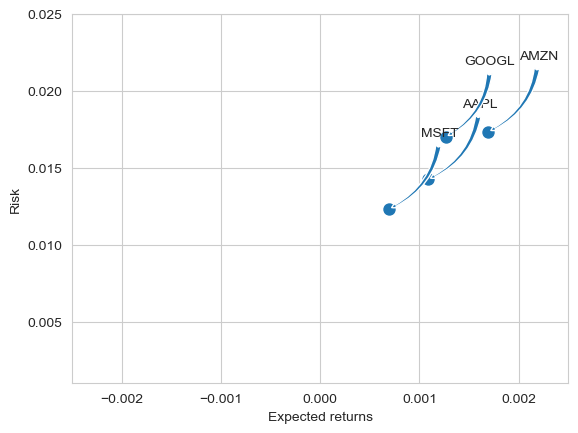

In [51]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6708\684848562.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=50,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

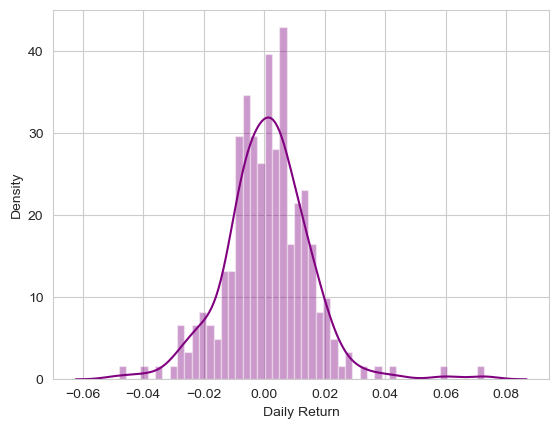

In [53]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=50,color='purple')

Now we can use quantile to get the risk value for the stock.

In [54]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.02174326017728795

The 0.05 empirical quantile of daily returns is at -0.0217. That means that with 95% confidence, our worst daily loss will not exceed 2.17%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0217 * 1,000,000 = $21,700.

In [55]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.024061588365033304

In [56]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.02421631428056059

In [57]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.02193095432929243

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [58]:
rets.head()

Ticker                         AAPL      AMZN     GOOGL      MSFT
Date                                                             
2023-12-05 00:00:00+00:00  0.021063  0.014085  0.013305  0.009156
2023-12-06 00:00:00+00:00 -0.005687 -0.016068 -0.007405 -0.009986
2023-12-07 00:00:00+00:00  0.010139  0.016330  0.053146  0.005830
2023-12-08 00:00:00+00:00  0.007412  0.003676 -0.014168  0.008842
2023-12-11 00:00:00+00:00 -0.012927 -0.010379 -0.012594 -0.007829

In [59]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [60]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [61]:
# For Google Stock - GOOGL
GOOGL.head()

Price                       Adj Close       Close        High         Low  \
Ticker                          GOOGL       GOOGL       GOOGL       GOOGL   
Date                                                                        
2023-12-04 00:00:00+00:00  128.950699  129.270004  130.029999  127.900002   
2023-12-05 00:00:00+00:00  130.666458  130.990005  132.139999  128.250000   
2023-12-06 00:00:00+00:00  129.698853  130.020004  131.839996  129.880005   
2023-12-07 00:00:00+00:00  136.591766  136.929993  138.559998  134.699997   
2023-12-08 00:00:00+00:00  134.656570  134.990005  136.399994  134.029999   

Price                            Open    Volume  
Ticker                          GOOGL     GOOGL  
Date                                             
2023-12-04 00:00:00+00:00  129.880005  36669900  
2023-12-05 00:00:00+00:00  128.949997  27384800  
2023-12-06 00:00:00+00:00  131.440002  23576200  
2023-12-07 00:00:00+00:00  135.039993  56767100  
2023-12-08 00:00:00+00:00  134.199997  32233900

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

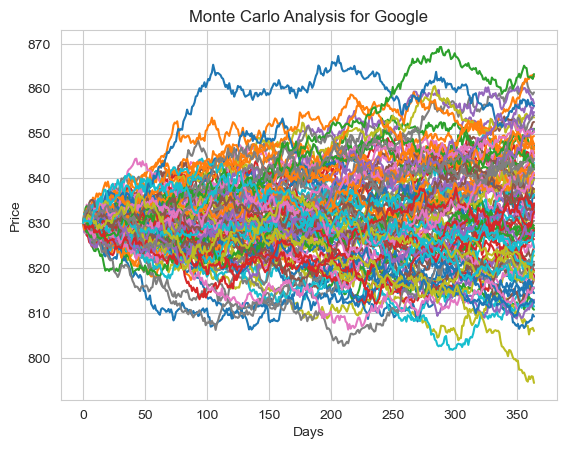

In [62]:
start_price = 830.09

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [63]:
# For Amazon Stock - AMZN
AMZN.head()

Price                       Adj Close       Close        High         Low  \
Ticker                           AMZN        AMZN        AMZN        AMZN   
Date                                                                        
2023-12-04 00:00:00+00:00  144.839996  144.839996  145.350006  142.809998   
2023-12-05 00:00:00+00:00  146.880005  146.880005  148.570007  143.130005   
2023-12-06 00:00:00+00:00  144.520004  144.520004  147.850006  144.279999   
2023-12-07 00:00:00+00:00  146.880005  146.880005  147.919998  145.339996   
2023-12-08 00:00:00+00:00  147.419998  147.419998  147.839996  145.399994   

Price                            Open    Volume  
Ticker                           AMZN      AMZN  
Date                                             
2023-12-04 00:00:00+00:00  145.250000  48294200  
2023-12-05 00:00:00+00:00  143.550003  46822400  
2023-12-06 00:00:00+00:00  147.580002  39679000  
2023-12-07 00:00:00+00:00  146.149994  52352800  
2023-12-08 00:00:00+00:00  145.479996  41858000

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

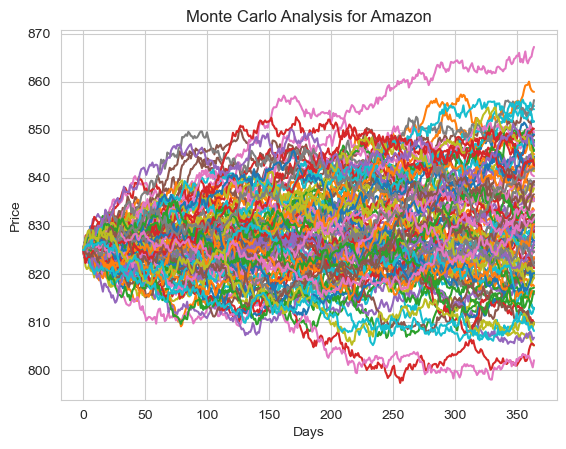

In [64]:
start_price = 824.95

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [65]:
# For Apple Stock - AAPL
AAPL.head()

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-12-04 00:00:00+00:00  188.506500  189.429993  190.050003  187.449997   
2023-12-05 00:00:00+00:00  192.477051  193.419998  194.399994  190.179993   
2023-12-06 00:00:00+00:00  191.382431  192.320007  194.759995  192.110001   
2023-12-07 00:00:00+00:00  193.322922  194.270004  195.000000  193.589996   
2023-12-08 00:00:00+00:00  194.755875  195.710007  195.990005  193.669998   

Price                            Open    Volume MA for 10 days MA for 20 days  \
Ticker                           AAPL      AAPL                                 
Date                                                                            
2023-12-04 00:00:00+00:00  189.979996  43389500            NaN            NaN   
2023-12-05 00:00:00+00:00  190.210007  66628400            NaN            NaN   
2023-12-06 00:00:00+00:00  194.449997  41089700            NaN            NaN   
2023-12-07 00:00:00+00:00  193.630005  47477700            NaN            NaN   
2023-12-08 00:00:00+00:00  194.199997  53377300            NaN            NaN   

Price                     MA for 50 days MA for 100 days Daily Return  
Ticker                                                                 
Date                                                                   
2023-12-04 00:00:00+00:00            NaN             NaN          NaN  
2023-12-05 00:00:00+00:00            NaN             NaN     0.021063  
2023-12-06 00:00:00+00:00            NaN             NaN    -0.005687  
2023-12-07 00:00:00+00:00            NaN             NaN     0.010139  
2023-12-08 00:00:00+00:00            NaN             NaN     0.007412

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

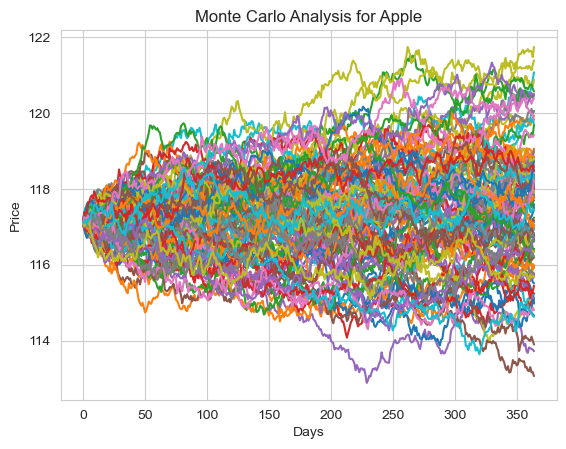

In [66]:
start_price = 117.10

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [67]:
# For Microsoft Stock - MSFT
MSFT.head()

Price                       Adj Close       Close        High         Low  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Date                                                                        
2023-12-04 00:00:00+00:00  366.400116  369.140015  369.519989  362.899994   
2023-12-05 00:00:00+00:00  369.755005  372.519989  373.079987  365.619995   
2023-12-06 00:00:00+00:00  366.062622  368.799988  374.179993  368.029999   
2023-12-07 00:00:00+00:00  368.196655  370.950012  371.450012  366.320007   
2023-12-08 00:00:00+00:00  371.452332  374.230011  374.459991  368.230011   

Price                            Open    Volume  
Ticker                           MSFT      MSFT  
Date                                             
2023-12-04 00:00:00+00:00  369.100006  32063300  
2023-12-05 00:00:00+00:00  366.450012  23065000  
2023-12-06 00:00:00+00:00  373.540009  21182100  
2023-12-07 00:00:00+00:00  368.230011  23118900  
2023-12-08 00:00:00+00:00  369.200012  20144800

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

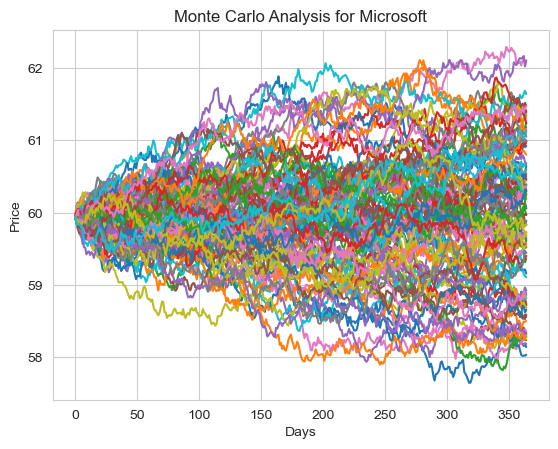

In [68]:
start_price = 59.94

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [69]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

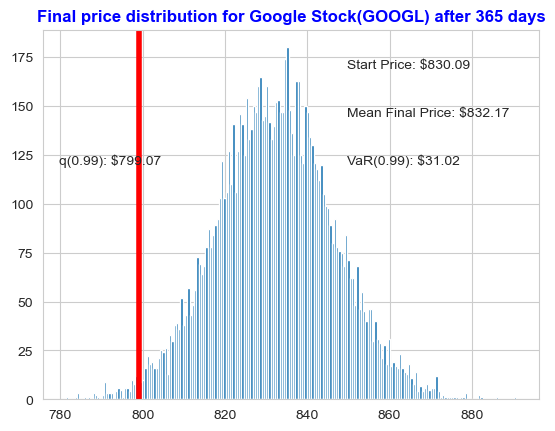

In [72]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='blue')


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $31.02 for every investment of 
830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $31.02 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [73]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock(AMZN) after 365 days')

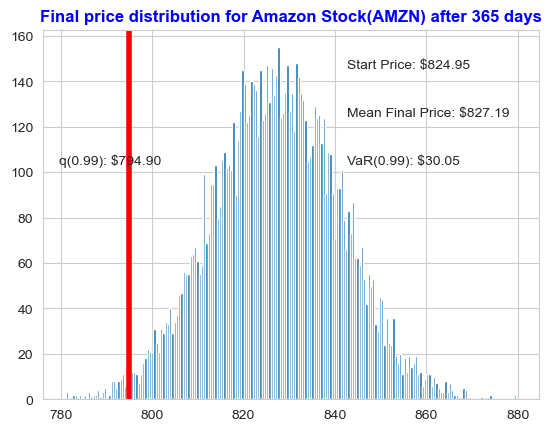

In [75]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='blue')

This basically means for every initial AMZN stock you purchase you're putting about $30.05 at risk 99% of the time from our Monte Carlo Simulation.

In [76]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock(AAPL) after 365 days')

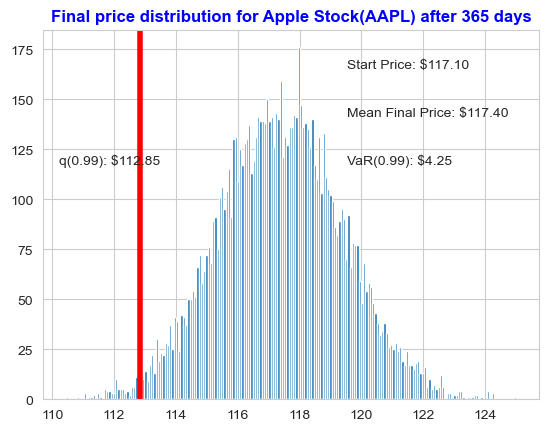

In [77]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='Blue')

Great! This basically means for every initial AAPL stock you purchase you're putting about $4.25 at risk 99% of the time from our Monte Carlo Simulation.

In [78]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Microsoft Stock(MSFT) after 365 days')

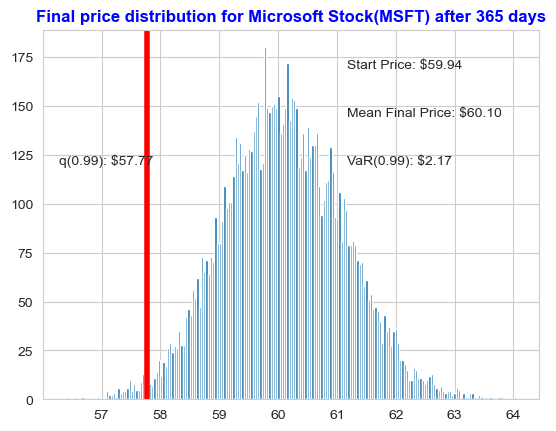

In [79]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='blue')

Nice, This basically means for every initial MSFT stock you purchase you're putting about $2.17 at risk 99% of the time from our Monte Carlo Simulation.

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.


We'll estimate the VaR for:
 - Johnson & Johnson > JNJ (U.S.: NYSE) [JNJ](http://quotes.wsj.com/JNJ)
 - Wal-Mart Stores Inc. > WMT (U.S.: NYSE) [WMT](http://quotes.wsj.com/WMT)
 - Nike Inc. > NKE (U.S.: NYSE) [NKE](http://quotes.wsj.com/NKE)
 

By using the above methods to get Value at Risk.

In [84]:
# List of NYSE_stocks for analytics
import yfinance as yf
NYSE_list = ['JNJ', 'NKE', 'WMT']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

# Loop for grabbing and dynamically assigning stock data to variables
for stock in NYSE_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Now you can use AAPL.head(), GOOGL.head(), etc.
print(JNJ.head())  # Display data for Apple (AAPL)
print(NKE.head())  # Display data for Google (GOOGL)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                            JNJ         JNJ         JNJ         JNJ   
Date                                                                        
2023-12-04 00:00:00+00:00  154.004379  158.880005  160.020004  158.000000   
2023-12-05 00:00:00+00:00  153.684509  158.550003  159.630005  158.220001   
2023-12-06 00:00:00+00:00  151.813721  156.619995  158.660004  156.169998   
2023-12-07 00:00:00+00:00  150.631165  155.399994  156.580002  154.710007   
2023-12-08 00:00:00+00:00  149.681229  154.419998  155.850006  153.839996   

Price                            Open   Volume  
Ticker                            JNJ      JNJ  
Date                                            
2023-12-04 00:00:00+00:00  158.000000  8920300  
2023-12-05 00:00:00+00:00  158.800003  7268200  
2023-12-06 00:00:00+00:00  158.520004  6642900  
2023-12-07 00:00:00+00:00  156.580002  6532400  
2023-12-08 00:00:00+00:00  155.419998  6

Let's go ahead and play aorund with the JNJ(Johnson & Johnson) Stock DataFrame to get a feel for the data.

In [85]:
JNJ.head()

Price                       Adj Close       Close        High         Low  \
Ticker                            JNJ         JNJ         JNJ         JNJ   
Date                                                                        
2023-12-04 00:00:00+00:00  154.004379  158.880005  160.020004  158.000000   
2023-12-05 00:00:00+00:00  153.684509  158.550003  159.630005  158.220001   
2023-12-06 00:00:00+00:00  151.813721  156.619995  158.660004  156.169998   
2023-12-07 00:00:00+00:00  150.631165  155.399994  156.580002  154.710007   
2023-12-08 00:00:00+00:00  149.681229  154.419998  155.850006  153.839996   

Price                            Open   Volume  
Ticker                            JNJ      JNJ  
Date                                            
2023-12-04 00:00:00+00:00  158.000000  8920300  
2023-12-05 00:00:00+00:00  158.800003  7268200  
2023-12-06 00:00:00+00:00  158.520004  6642900  
2023-12-07 00:00:00+00:00  156.580002  6532400  
2023-12-08 00:00:00+00:00  155.419998  6253700

In [86]:
JNJ.describe()

Price    Adj Close       Close        High         Low        Open  \
Ticker         JNJ         JNJ         JNJ         JNJ         JNJ   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    153.399801  156.255000  157.277500  155.147976  156.249563   
std       6.251790    6.002852    5.991445    5.979624    5.969654   
min     141.080292  144.380005  145.410004  143.130005  143.820007   
25%     148.722900  151.537498  152.922497  150.782494  151.810005   
50%     154.014069  156.814995  158.360001  155.964996  156.799995   
75%     157.703033  160.767494  161.557503  159.802502  160.805000   
max     166.047668  167.380005  168.850006  166.750000  167.809998   

Price         Volume  
Ticker           JNJ  
count   2.520000e+02  
mean    7.064554e+06  
std     2.244622e+06  
min     3.246200e+06  
25%     5.534100e+06  
50%     6.647200e+06  
75%     8.232425e+06  
max     2.171250e+07

In [87]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-12-04 00:00:00+00:00 to 2024-12-03 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, JNJ)  252 non-null    float64
 1   (Close, JNJ)      252 non-null    float64
 2   (High, JNJ)       252 non-null    float64
 3   (Low, JNJ)        252 non-null    float64
 4   (Open, JNJ)       252 non-null    float64
 5   (Volume, JNJ)     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the closing prices of NYSE stocks.

<Axes: title={'center': 'Closing Price - JNJ'}, xlabel='Date'>

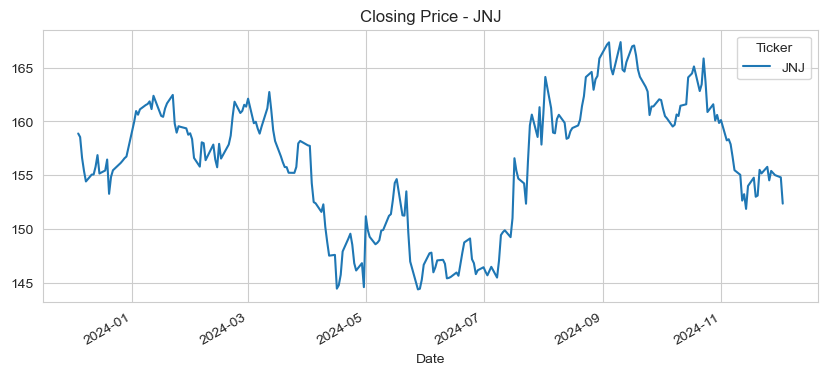

In [88]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))

<Axes: title={'center': 'Closing Price - NKE'}, xlabel='Date'>

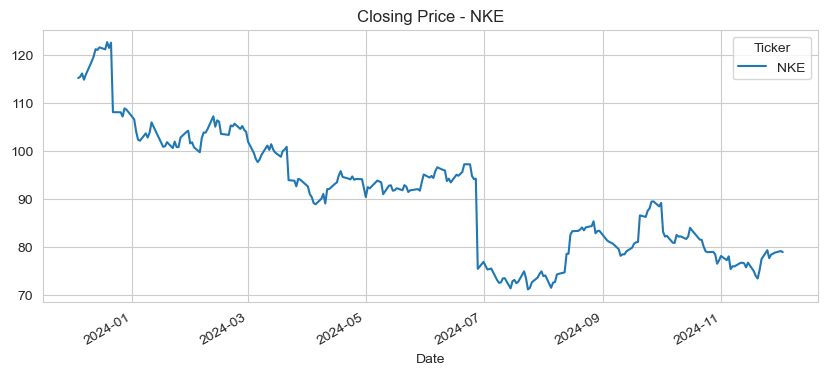

In [89]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))

<Axes: title={'center': 'Closing Price - WMT'}, xlabel='Date'>

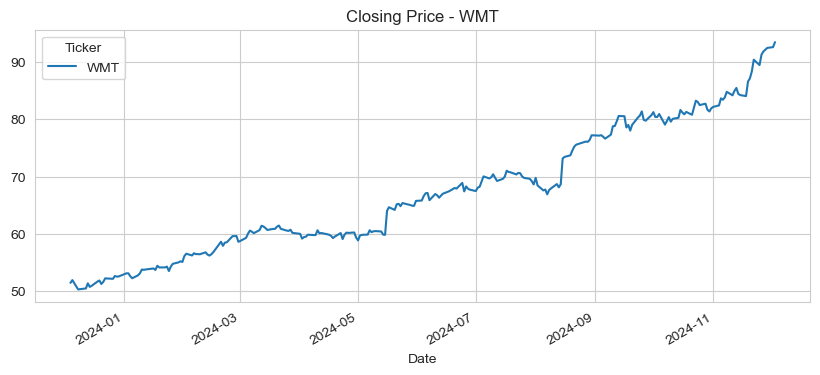

In [90]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(10,4))

### Value at risk using the "Bootstrap" method

we will calculate the empirical quantiles from a histogram of daily returns.

Let's go ahead and use pandas to retrieve the daily returns for the JNJ, WMT & NKE stock.

In [91]:
# We'll use pct_change to find the percent change for each day

#For JNJ stocks
JNJ['Daily Return'] = JNJ['Close'].pct_change()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6708\1763548153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(JNJ['Daily Return'].dropna(),bins=100,color='Red')


<Axes: xlabel='Daily Return', ylabel='Density'>

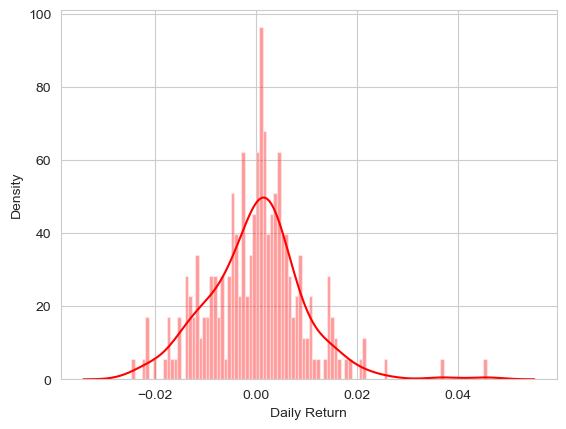

In [93]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(JNJ['Daily Return'].dropna(),bins=100,color='Red')

In [94]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.015387180901639375

The 0.05 empirical quantile of JNJ stock daily returns is at -0.015. That means that with 95% confidence, our worst daily loss will not exceed 1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.015 * 1,000,000 = $15,000.

In [95]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6708\233187684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='Green')


<Axes: xlabel='Daily Return', ylabel='Density'>

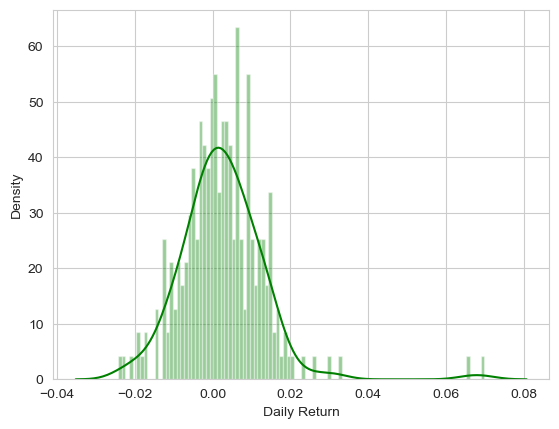

In [96]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='Green')

In [97]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.012607860158861783

The 0.05 empirical quantile of WMT stock daily returns is at -0.0126. That means that with 95% confidence, our worst daily loss will not exceed 1.26%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0126 * 1,000,000 = $12,600.

In [98]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6708\682528083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='Blue')


<Axes: xlabel='Daily Return', ylabel='Density'>

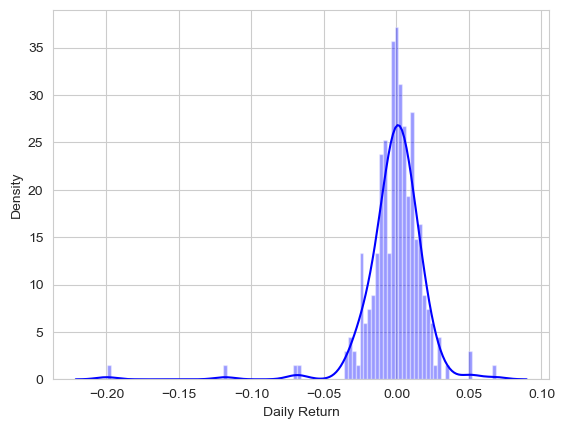

In [99]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='Blue')

In [100]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.025170773152182913

The 0.05 empirical quantile of NKE stock daily returns is at -0.018. That means that with 95% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.025 * 1,000,000 = $25,000.